 Confusion Matrix:
 [[7168  789]
 [ 203 1740]]

 Classification Report:
               precision    recall  f1-score   support

       Water       0.97      0.90      0.94      7957
        Kelp       0.69      0.90      0.78      1943

    accuracy                           0.90      9900
   macro avg       0.83      0.90      0.86      9900
weighted avg       0.92      0.90      0.90      9900



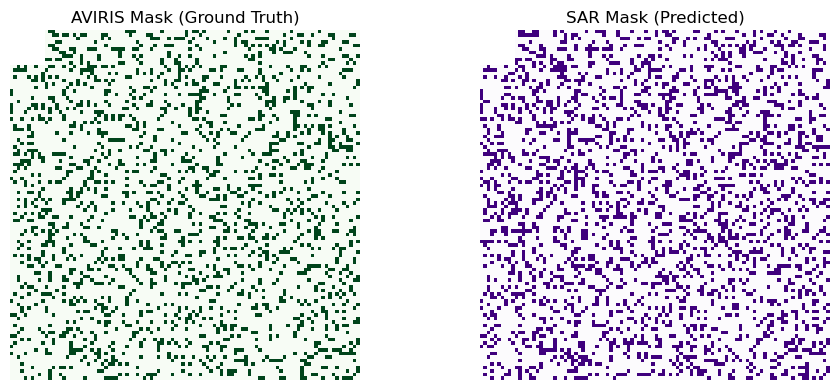

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Simulate two 100x100 binary kelp masks
np.random.seed(42)

# AVIRIS = ground truth (80% water, 20% kelp) — as float for NaN support
aviris_mask = np.random.choice([0, 1], size=(100, 100), p=[0.8, 0.2]).astype(float)
sar_mask = aviris_mask.copy()

# Introduce random classification errors (10% of pixels flipped)
error_mask = np.random.rand(100, 100) < 0.1
sar_mask[error_mask] = 1 - sar_mask[error_mask]

# Simulate invalid pixels using NaN
aviris_mask[0:10, 0:10] = np.nan
sar_mask[0:10, 0:10] = np.nan

# Filter to valid pixels
valid = ~np.isnan(aviris_mask) & ~np.isnan(sar_mask)

# Flatten and evaluate
y_true = aviris_mask[valid].astype(int).flatten()
y_pred = sar_mask[valid].astype(int).flatten()

# Confusion matrix and performance
cm = confusion_matrix(y_true, y_pred)
print(" Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_true, y_pred, target_names=["Water", "Kelp"]))

# Optional: Visualize masks
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(aviris_mask, cmap='Greens', interpolation='nearest')
ax[0].set_title("AVIRIS Mask (Ground Truth)")
ax[1].imshow(sar_mask, cmap='Purples', interpolation='nearest')
ax[1].set_title("SAR Mask (Predicted)")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()
